In [205]:
import networkx as nx

In [206]:
# import the graph of the relations among the Florentine families
FFG = nx.florentine_families_graph()

### Degree centrality

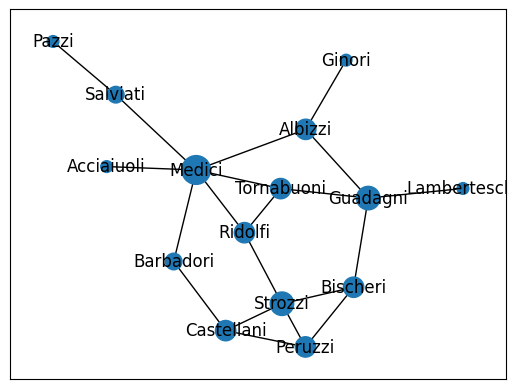

In [207]:
dc = nx.degree_centrality(FFG)
ns = list(dc.values())
ns = [x * 1000 for x in ns]
nx.draw_networkx(FFG,node_size=ns, pos=nx.spring_layout(FFG, seed=1222))

### Closeness centrality

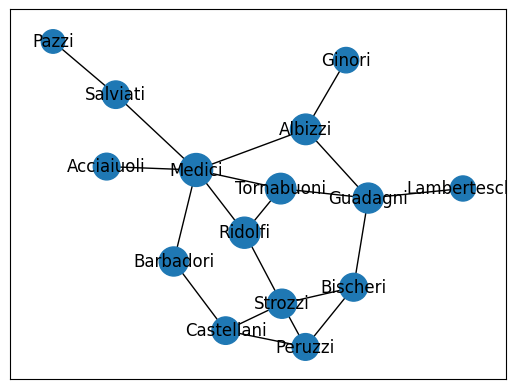

In [208]:
cc = nx.closeness_centrality(FFG)
ns = list(cc.values())
ns = [x * 1000 for x in ns]
nx.draw_networkx(FFG,node_size=ns, pos=nx.spring_layout(FFG, seed=1222))

### Betweenness centrality

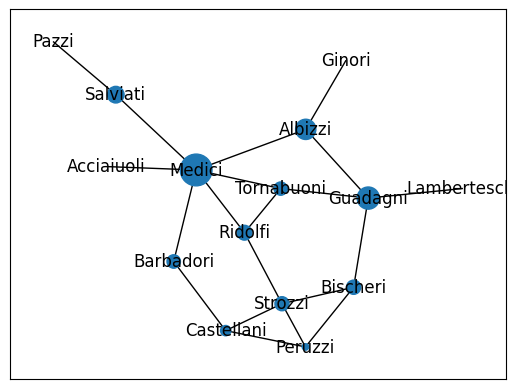

In [209]:
# betweeness_centrality
bc = nx.betweenness_centrality(FFG)
ns = list(bc.values())
ns = [x * 1000 for x in ns]
nx.draw_networkx(FFG,node_size=ns, pos=nx.spring_layout(FFG, seed=1222))

### Eigenvector centrality

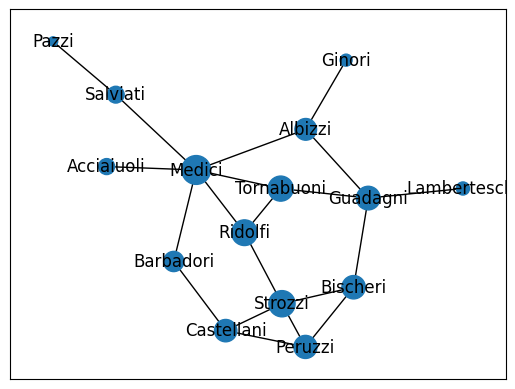

In [210]:
# eigenvector_centrality
ec = nx.eigenvector_centrality(FFG)
ns = list(ec.values())
ns = [x * 1000 for x in ns]
nx.draw_networkx(FFG,node_size=ns, pos=nx.spring_layout(FFG, seed=1222))

### Katz centrality

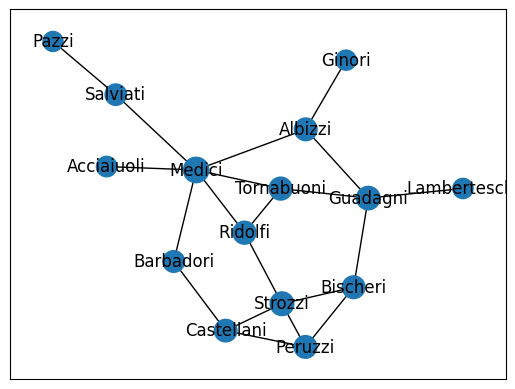

In [211]:
# katz_centrality
kc = nx.katz_centrality(FFG)
ns = list(kc.values())
ns = [x * 1000 for x in ns]
nx.draw_networkx(FFG,node_size=ns, pos=nx.spring_layout(FFG, seed=1222))

### Edge betweenness centrality

In [212]:
for k,v in nx.edge_betweenness_centrality(FFG).items():
    print(f"{k} = {v}")

('Acciaiuoli', 'Medici') = 0.13333333333333336
('Medici', 'Barbadori') = 0.1761904761904762
('Medici', 'Ridolfi') = 0.146031746031746
('Medici', 'Tornabuoni') = 0.12222222222222222
('Medici', 'Albizzi') = 0.21269841269841266
('Medici', 'Salviati') = 0.24761904761904763
('Castellani', 'Peruzzi') = 0.05714285714285715
('Castellani', 'Strozzi') = 0.05238095238095239
('Castellani', 'Barbadori') = 0.11904761904761905
('Peruzzi', 'Strozzi') = 0.04285714285714286
('Peruzzi', 'Bischeri') = 0.07142857142857144
('Strozzi', 'Ridolfi') = 0.1365079365079365
('Strozzi', 'Bischeri') = 0.07936507936507937
('Ridolfi', 'Tornabuoni') = 0.04761904761904762
('Tornabuoni', 'Guadagni') = 0.12222222222222223
('Albizzi', 'Ginori') = 0.13333333333333336
('Albizzi', 'Guadagni') = 0.15555555555555559
('Salviati', 'Pazzi') = 0.13333333333333336
('Bischeri', 'Guadagni') = 0.1634920634920635
('Guadagni', 'Lamberteschi') = 0.13333333333333336


### PageRank и HITS скорови за случајна Ердош-Рени насочена мрежа

In [213]:
# generate directed random network
G = nx.erdos_renyi_graph(30,0.1,directed=True)
print("Is the network weakly connected?",nx.is_weakly_connected(G))
print("The network has",nx.number_strongly_connected_components(G),"strongly connected components.")
Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print("The largest component has",G0.number_of_nodes(),"nodes.")

Is the network weakly connected? True
The network has 8 strongly connected components.
The largest component has 23 nodes.


### PageRank

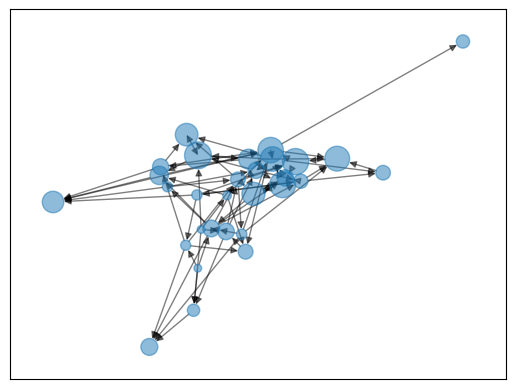

In [214]:
pr = nx.pagerank(G,alpha=0.9)
ns = list(pr.values())
ns = [x * 5000 for x in ns]
nx.draw_networkx(G,node_size=ns, with_labels=False, alpha=0.5)

### HITS (hub scores)

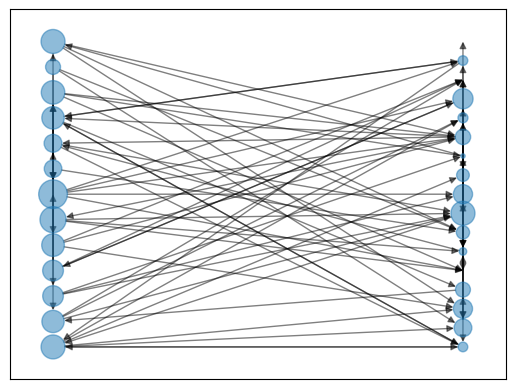

In [215]:
hits = nx.hits(G)
ns = list(hits[0].values())
ns = [x * 5000 for x in ns]
nx.draw_networkx(G,node_size=ns, pos=nx.bipartite_layout(G, nodes=[node for node in G.nodes() if hits[0][node]>hits[1][node]]), with_labels=False, alpha=0.5)

### HITS (authority scores)

/home/viktor/PycharmProjects/networkscience/venv/lib64/python3.11/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/viktor/PycharmProjects/networkscience/venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


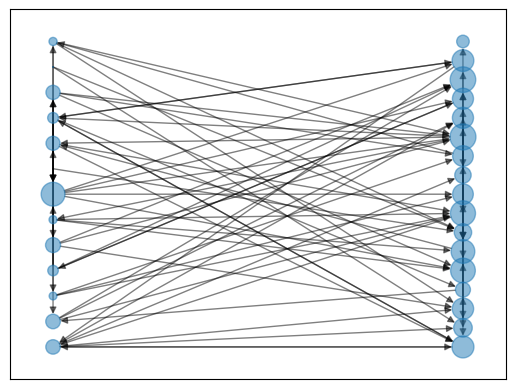

In [216]:
hits = nx.hits(G)
ns = list(hits[1].values())
ns = [x * 5000 for x in ns]
nx.draw_networkx(G,node_size=ns, pos=nx.bipartite_layout(G, nodes=[node for node in G.nodes() if hits[0][node]>hits[1][node]]), with_labels=False, alpha=0.5)

### Најцентрални 20 јазли според PageRank за насочена тежинска мрежа (USAir97)

Top 20 nodes by PageRank score:
311 = 0.05360000797923644
325 = 0.042758593367458284
261 = 0.02857808941931691
293 = 0.027880355758919683
321 = 0.025552077866461777
324 = 0.022464044811345275
322 = 0.02149979348844236
310 = 0.020818521213138243
313 = 0.018621609501586447
255 = 0.01758647772887153
299 = 0.016966979385538507
307 = 0.015336425178711489
308 = 0.014286352965709367
201 = 0.013548485926467903
118 = 0.012831172521097911
258 = 0.012759563737193147
301 = 0.011940338823451703
248 = 0.01079660767312598
182 = 0.01051934309770367
331 = 0.009791842220165667


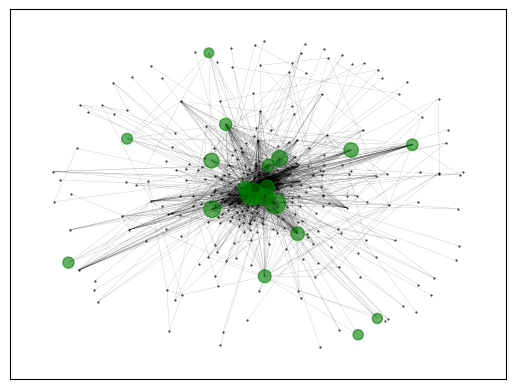

In [228]:
G = nx.read_weighted_edgelist("USAir97.edgelist",create_using=nx.DiGraph())
pr = {k:v for k, v in sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True)}
ns = [x * 5000 for x in list(pr.values())[0:20]]

print("Top 20 nodes by PageRank score:")
for k,v in list(pr.items())[0:20]:
    print(f"{k} = {v}")

pos=nx.spring_layout(G, seed=2414)
nx.draw_networkx_nodes(
    G,
    node_size=0.2,
    nodelist=[node for node in G.nodes() if node not in list(pr)[0:20]],
    node_color="black",
    pos=pos
)
nx.draw_networkx(
    G,
    node_size=ns,
    nodelist=[node for node in G.nodes() if node in list(pr)[0:20]],
    alpha=0.6,
    width=0.1,
    node_color="green",
    arrows=False,
    with_labels=False,
    pos=pos
)